<a href="https://colab.research.google.com/github/rizooool/Sentiment-Analysis-and-Text-Mining/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
from sklearn.datasets import fetch_california_housing

In [8]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

In [10]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [12]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

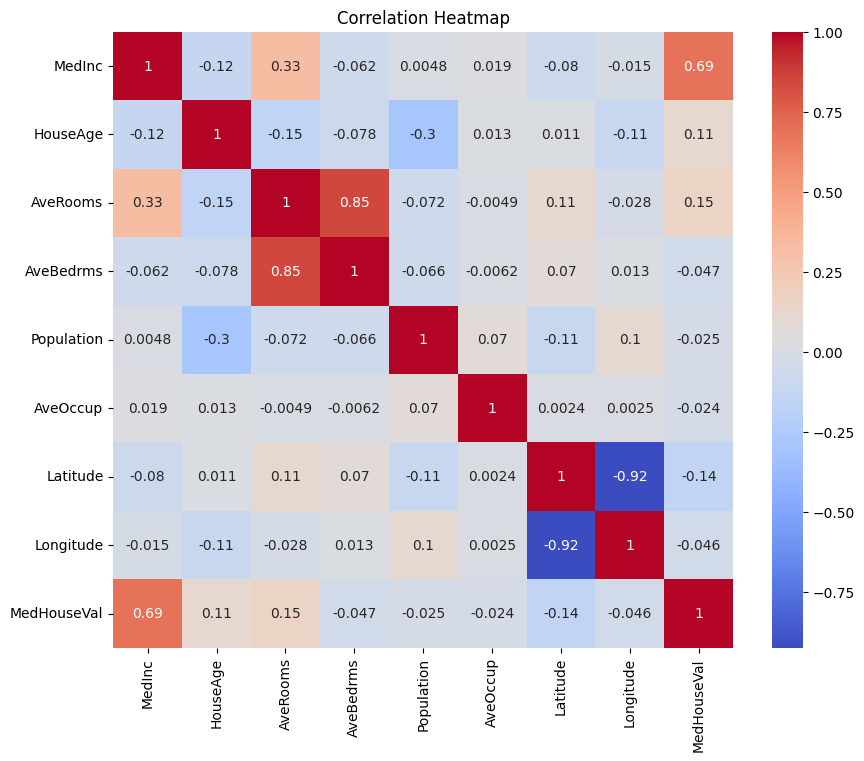

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [17]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print("Intercept:", model.intercept_)

Intercept: -37.02327770606409


In [21]:
print("Coefficients:", dict(zip(X.columns, model.coef_)))

Coefficients: {'MedInc': np.float64(0.44867490966571666), 'HouseAge': np.float64(0.009724257517904806), 'AveRooms': np.float64(-0.12332334282795815), 'AveBedrms': np.float64(0.7831449067929722), 'Population': np.float64(-2.029620580100075e-06), 'AveOccup': np.float64(-0.003526318487134238), 'Latitude': np.float64(-0.4197924865883604), 'Longitude': np.float64(-0.433708064963987)}


In [22]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.5757877060324508


In [23]:
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 0.5332001304956553


In [24]:
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 0.5558915986952444


In [25]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.7455813830127764


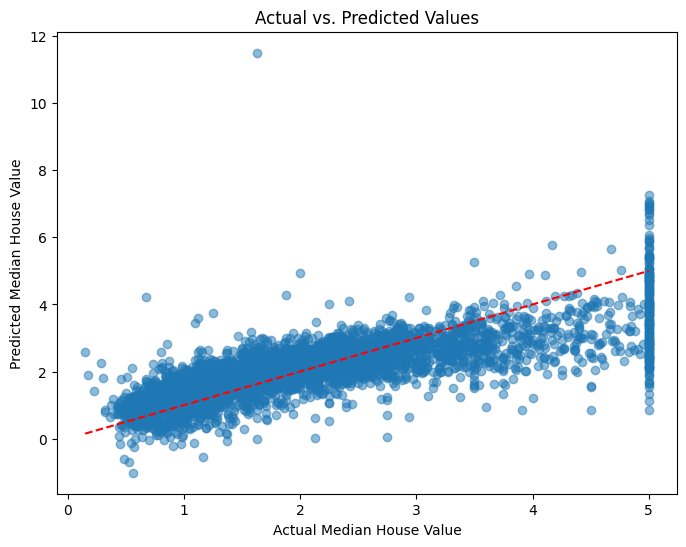

In [26]:
# Plotting predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
correlation = df.corr()['MedHouseVal'].abs().sort_values(ascending=False)
top_features = correlation.index[1:6]

In [29]:
X_top = df[top_features]

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [33]:
print("Improved R² Score:", r2_score(y_test, y_pred))

Improved R² Score: 0.5129333248216975


In [34]:
print("Improved MAE:", mean_absolute_error(y_test, y_pred))

Improved MAE: 0.5796603458789069


In [35]:
print("Improved MSE:", mean_squared_error(y_test, y_pred))

Improved MSE: 0.6382565441555915


In [36]:
print("Improved RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Improved RMSE: 0.798909596985536
